# Unemployment vs Vacancies 
Data on the professionals of the registered unemployed and vacancies by job title
##### Part1: Data aggregation and cleansing
##### Part2: Statistical DataSet Cleaning and Descriptive Analysis
##### Part3: Timeseries Analysis and future vacancies Prediction

Owner: State employment center of Ukraine

Source:https://www.dcz.gov.ua/publikaciya/3-dani-shchodo-profesiynogo-skladu-zareyestrovanyh-bezrobitnyh-ta-vakansiy-u-rozrizi

Data files pre-collected and renamed.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# find all files and extract names for set variable names latter
# os.chdir('D:\\Proj JDS\\SQLua\\input')
for dirpath, dirnames, filez in os.walk('.'):
    for file in filez:
        filename, filext = os.path.splitext(file)
        print(filename, " ", filext)

2018-01-05   .xlsx
2018-01-06   .xlsx
2018-01-07   .xls
2018-01-08   .xls
2018-01-09   .xls
2018-01-10   .xls
2018-01-11   .xls
2018-01-12   .xls
2019-01-01   .xls
2019-01-02   .xls
2019-01-03   .xls
2019-01-04   .xls
2019-01-05   .xls
2019-01-06   .xls
2019-01-07   .xls
2019-01-08   .xls
2019-01-09   .xls
2019-01-10   .xls
2019-01-11   .xls
2019-01-12   .xls
2020-01-01   .xls
2020-01-02   .xlsx
2020-01-03   .xlsx
2020-01-04   .xlsx
2020-01-06   .xlsx
2020-01-07   .xlsx
2020-01-08   .xlsx
2020-01-09   .xlsx
2018-01-05   .xlsx
2018-01-06   .xlsx
2018-01-07   .xls
2018-01-08   .xls
2018-01-09   .xls
2018-01-10   .xls
2018-01-11   .xls
2018-01-12   .xls


In [3]:
# testing on one file
file = '2018-01-08.xls'
filename, filext = os.path.splitext(file)

df=pd.read_excel(file, skiprows=[0])
# skiprows dont work in some cases.. why!?
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

df.columns = ['jobname', 'code', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6']
dfz = {}
dfz[filename] = df

print (file,' has ', dfz[filename].shape, ' shape as dataframe')
dfz[filename].head()

2018-01-08.xls  has  (6174, 8)  shape as dataframe


,jobname,code,c1,c2,c3,c4,c5,c6
0,Назва професії (посади),Код професії (посади),за січень-липень 2018 року,NaN,NaN,станом на 1 серпня 2018 року,NaN,NaN
1,NaN,NaN,"Чисельність безробітних, осіб","Кількість вакансій, одиниць","Дефіцит вакансій (-), дефіцит кадрів (+)","Чисельність безробітних, осіб","Кількість вакансій, одиниць","Дефіцит вакансій (-), дефіцит кадрів (+)"
2,А,Б,1,2,3,4,5,6
3,Усього,NaN,740933,698042,-42891,297955,86814,-211141
4,військовослужбовець,1001,9294,0,-9294,3583,0,-3583


In [4]:
# preset
dfz = {}
sum_df = pd.DataFrame(data={}, index = ['unemployed','vacancies'])
sub = "без професії"

# Walk through all files
for dirpath, dirnames, filez in os.walk('.'):
    for file in filez:
        filename, filext = os.path.splitext(file)
        # Load files into dataframes
        df=pd.read_excel(file)
        df.dropna(how='all', inplace=True)
        df.reset_index(drop=True, inplace=True)
        
        # Dataframe cleaning 
        df.columns = ['jobname', 'code', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6']
        df.drop(columns=['c1', 'c2', 'c3', 'c6'], inplace = True)
        sum_df[filename] = [df.iloc[3]['c4'], df.iloc[3]['c5']]
        df.drop([0,1,2,3], inplace=True)
        df.reset_index(drop=True, inplace=True)
        
        # manual error correction in the last line 
        # find substring and replace single value: code and vacancies stats 
        df.loc[df['jobname'].str.contains(sub),'c5'] = 0
        df.loc[df['jobname'].str.contains(sub),'code'] = '9999'
               
        # Change stats datatype to numeric
        df[['c4','c5']] = df[['c4','c5']].apply(pd.to_numeric)
        
        c4_newname = 'unemployed.' + filename 
        c5_newname = 'vacancies.' + filename
        df.rename(columns={'c4':c4_newname, 'c5':c5_newname}, inplace=True)       
    
        # Done. Save
        dfz[filename] = df.copy() 
       
        print (file,' has ', dfz[filename].shape, ' shape as dataframe')      

2018-01-05.xlsx  has  (6501, 4)  shape as dataframe
2018-01-06.xlsx  has  (6585, 4)  shape as dataframe
2018-01-07.xls  has  (6649, 4)  shape as dataframe
2018-01-08.xls  has  (6170, 4)  shape as dataframe
2018-01-09.xls  has  (6260, 4)  shape as dataframe
2018-01-10.xls  has  (6339, 4)  shape as dataframe
2018-01-11.xls  has  (6419, 4)  shape as dataframe
2018-01-12.xls  has  (6480, 4)  shape as dataframe
2019-01-01.xls  has  (6538, 4)  shape as dataframe
2019-01-02.xls  has  (5321, 4)  shape as dataframe
2019-01-03.xls  has  (5553, 4)  shape as dataframe
2019-01-04.xls  has  (5726, 4)  shape as dataframe
2019-01-05.xls  has  (5864, 4)  shape as dataframe
2019-01-06.xls  has  (5996, 4)  shape as dataframe
2019-01-07.xls  has  (6693, 4)  shape as dataframe
2019-01-08.xls  has  (6762, 4)  shape as dataframe
2019-01-09.xls  has  (6805, 4)  shape as dataframe
2019-01-10.xls  has  (6850, 4)  shape as dataframe
2019-01-11.xls  has  (6909, 4)  shape as dataframe
2019-01-12.xls  has  (6960, 4

In [5]:
# voilà les informations dont nous disposons :)
print('Summary dataframe:')
sum_df=sum_df.T
sum_df.index.name='date'
sum_df.reset_index(inplace=True)
sum_df

Summary dataframe:


,date,unemployed,vacancies
0,2018-01-05,326767,83802
1,2018-01-06,316030,86154
2,2018-01-07,303860,82399
3,2018-01-08,297955,86814
4,2018-01-09,292832,100290
5,2018-01-10,287092,96964
6,2018-01-11,271441,97323
7,2018-01-12,301001,81163
8,2019-01-01,341652,58441
9,2019-01-02,364271,67789


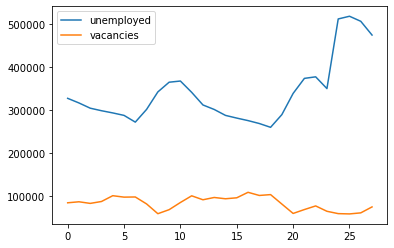

In [6]:
# Quick view
sum_df.plot();

#### As we can see all values are meaningful and have adequate ranges. We can save results and go further 

In [8]:
#Export to csv
#sum_df.to_csv('D:\\Proj JDS\\SQLua\\result\\unempl_vs_vacancies_summary.csv', index=False)
sum_df.to_csv('unempl_vs_vacancies_summary.csv', index=False)

---

## Bring in everything all together (by concat)


In [9]:
fulldf=pd.concat(dfz)
fulldf.reset_index(drop=True, inplace=True)
# bring order to jobnames
fulldf['jobname']=fulldf['jobname'].str.strip()
fulldf['jobname']=fulldf['jobname'].str.lower()
# fill NaN
fulldf.fillna(0, inplace=True)
# group by jobname, code and sum
fulldf=fulldf.groupby(['jobname','code']).sum().reset_index()

print('All jobs =', fulldf.shape[0])
fulldf.sample(3)

All jobs = 7634


,jobname,code,unemployed.2018-01-05,vacancies.2018-01-05,unemployed.2018-01-06,vacancies.2018-01-06,unemployed.2018-01-07,vacancies.2018-01-07,unemployed.2018-01-08,vacancies.2018-01-08,...,unemployed.2020-01-04,vacancies.2020-01-04,unemployed.2020-01-06,vacancies.2020-01-06,unemployed.2020-01-07,vacancies.2020-01-07,unemployed.2020-01-08,vacancies.2020-01-08,unemployed.2020-01-09,vacancies.2020-01-09
3653,менеджер (управитель) ресторану,1456,22.0,0.0,25.0,1.0,29.0,2.0,22.0,2.0,...,36.0,1.0,71.0,1.0,76.0,1.0,72.0,3.0,69.0,2.0
2731,копрівник,8332,2.0,2.0,2.0,4.0,2.0,4.0,2.0,3.0,...,5.0,0.0,5.0,0.0,5.0,0.0,8.0,0.0,6.0,0.0
6571,технік-гідрогеолог,3111,13.0,1.0,11.0,1.0,10.0,1.0,8.0,1.0,...,3.0,0.0,3.0,0.0,2.0,0.0,3.0,1.0,3.0,1.0


In [10]:
# Ghost jobs check
print('All jobs =', fulldf.shape[0])
print('Ghost jobs =',fulldf.drop(columns=['jobname', 'code']).eq(0).all(1).sum())
fulldf_ghost=fulldf[fulldf.drop(columns=['jobname', 'code']).eq(0).all(1)]
fulldf_ghost.sample(3)

All jobs = 7634
Ghost jobs = 613


,jobname,code,unemployed.2018-01-05,vacancies.2018-01-05,unemployed.2018-01-06,vacancies.2018-01-06,unemployed.2018-01-07,vacancies.2018-01-07,unemployed.2018-01-08,vacancies.2018-01-08,...,unemployed.2020-01-04,vacancies.2020-01-04,unemployed.2020-01-06,vacancies.2020-01-06,unemployed.2020-01-07,vacancies.2020-01-07,unemployed.2020-01-08,vacancies.2020-01-08,unemployed.2020-01-09,vacancies.2020-01-09
3531,машиніст сталеструминної машини (трубне виробн...,8124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2160,запаювальник ампул,8221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4700,оператор електроакустичних вимірювань,7242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Ghost jobs remove
print('--- Remove ghost job ---')
fulldf = fulldf[fulldf.drop(columns=['jobname', 'code']).ne(0).any(1)]
fulldf.reset_index(drop=True, inplace=True)
print('All jobs after cleanup =', fulldf.shape[0])
print('Ghost jobs =',fulldf.drop(columns=['jobname', 'code']).eq(0).all(1).sum())

--- Remove ghost job ---
All jobs after cleanup = 7021
Ghost jobs = 0


In [12]:
# Order and first look after arange
fulldf=fulldf.sort_values(['code'])
fulldf.reset_index(drop=True, inplace=True)
print(fulldf.shape)
fulldf

(7021, 58)


,jobname,code,unemployed.2018-01-05,vacancies.2018-01-05,unemployed.2018-01-06,vacancies.2018-01-06,unemployed.2018-01-07,vacancies.2018-01-07,unemployed.2018-01-08,vacancies.2018-01-08,...,unemployed.2020-01-04,vacancies.2020-01-04,unemployed.2020-01-06,vacancies.2020-01-06,unemployed.2020-01-07,vacancies.2020-01-07,unemployed.2020-01-08,vacancies.2020-01-08,unemployed.2020-01-09,vacancies.2020-01-09
0,військовослужбовець,1001,4570.0,0.0,4162.0,0.0,3854.0,0.0,3583.0,0.0,...,2934.0,0.0,3668.0,0.0,3678.0,0.0,3606.0,0.0,3419.0,0.0
1,народний депутат україни,1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,7.0,0.0,7.0,0.0,7.0,0.0,6.0,0.0
2,заступник голови постійної комісії верховної р...,1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,урядовий уповноважений,1120.1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,голова інспекції,1120.1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,вантажник,9333,1656.0,1342.0,1438.0,1611.0,1361.0,1712.0,1277.0,1823.0,...,1865.0,543.0,3558.0,555.0,3803.0,567.0,3631.0,666.0,3154.0,762.0
7017,вантажник біовідходів,9333,0.0,0.0,0.0,2.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7018,комірник,9411,1905.0,388.0,1832.0,436.0,1850.0,424.0,1793.0,470.0,...,2296.0,232.0,4076.0,210.0,4245.0,214.0,4096.0,237.0,3718.0,296.0
7019,вагар,9411,919.0,73.0,812.0,107.0,640.0,115.0,465.0,42.0,...,998.0,47.0,948.0,56.0,792.0,111.0,578.0,43.0,497.0,36.0


### Done. Export.

In [13]:
#Export to csv
#fulldf.to_csv('D:\\Proj JDS\\SQLua\\result\\unempl_vs_vacancies.csv', index=False)
fulldf.to_csv('unempl_vs_vacancies.csv', index=False)

---